## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8215 - acc: 0.3492 - val_loss: 1.6671 - val_acc: 0.4073
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5980 - acc: 0.4342 - val_loss: 1.6006 - val_acc: 0.4256
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5056 - acc: 0.4650 - val_loss: 1.5196 - val_acc: 0.4625
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4437 - acc: 0.4855 - val_loss: 1.5039 - val_acc: 0.4593
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4003 - acc: 0.5028 - val_loss: 1.4998 - val_acc: 0.4653
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3641 - acc: 0.5169 - val_loss: 1.4686 - val_acc: 0.4779
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3275 - acc: 0.5292 - val_loss: 1.5667 - 

Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8034 - acc: 0.3666 - val_loss: 1.7525 - val_acc: 0.3802
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7194 - acc: 0.3987 - val_loss: 1.6871 - val_acc: 0.4094
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6600 - acc: 0.4172 - val_loss: 1.6400 - val_acc: 0.4260
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6126 - acc: 0.4351 - val_loss: 1.5925 - val_acc: 0.4423
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5721 - acc: 0.4487 - val_loss: 1.5859 - val_acc: 0.4306
Epoch 7/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5387 - acc: 0.4606 - val_loss: 1.5410 - val_acc: 0.4564
Epoch 8/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5075 - acc: 0.4712 - val_loss: 1.5204 - val_acc: 0.4632
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 101us/step - loss: 2.0275 - acc: 0.2878 - val_loss: 1.9998 - val_acc: 0.2983
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.9737 - acc: 0.3077 - val_loss: 1.9552 - val_acc: 0.3143
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9345 - acc: 0.3227 - val_loss: 1.9223 - val_acc: 0.3299
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.9038 - acc: 0.3339 - val_loss: 1.8949 - val_acc: 0.3371
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8787 - acc: 0.3441 - val_loss: 1.8731 - val_acc: 0.3475
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8579 - acc: 0.3517 - val_loss: 1.8538 - val_acc: 0.3548
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8400 - acc: 0.3583 - val_loss: 1.8381 - val_acc: 0.3571
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 134us/step - loss: 2.2541 - acc: 0.1715 - val_loss: 2.2488 - val_acc: 0.1785
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.2416 - acc: 0.1829 - val_loss: 2.2366 - val_acc: 0.1900
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2298 - acc: 0.1939 - val_loss: 2.2248 - val_acc: 0.1981
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.2184 - acc: 0.2017 - val_loss: 2.2135 - val_acc: 0.2088
Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2073 - acc: 0.2099 - val_loss: 2.2027 - val_acc: 0.2148
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1965 - acc: 0.2159 - val_loss: 2.1920 - val_acc: 0.2215
Epoch 10/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.1860 - acc: 0.2210 - val_loss: 2.1817 - val_acc: 0.2254
Epoch 11/50
50000/50000 [===================

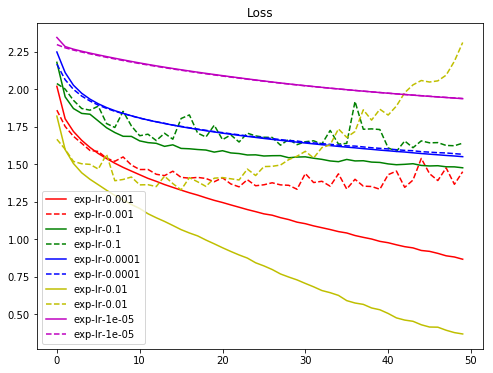

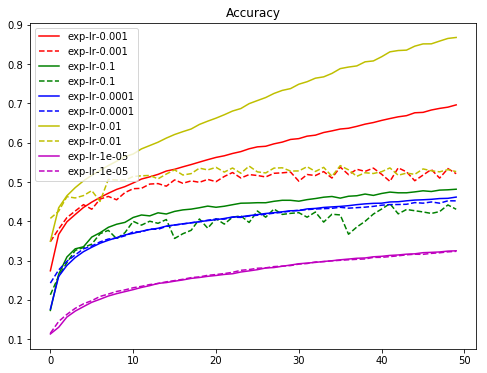

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現